# Assignment 1

The car's market price data set consists of three types of entities: 
* the specification of an auto in terms of various characteristics;
* its assigned insurance risk rating;
* its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

### Attribute Information

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo 
4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 to 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

### Relevant Papers

Kibler, D., Aha, D.W., & Albert,M. (1989). Instance-based prediction of real-valued attributes. Computational Intelligence, Vol 5, 51--57. 

### Library imports

In [1]:
import pandas as pd
import matplotlib as mp
%matplotlib inline
import numpy as np
import sklearn as sl
import seaborn as sns

## Task 1 - Data Exploration [10 Marks]

###  1.1 Import Data

**Q [1 Mark]:** Upload the dataset of `Cars.data`. Import the dataset into a data frame named **cars**. Please also name each attribute (see *Attribute Information* section above).

In [11]:
cars = pd.read_csv("Cars.data", names=["symboling",
                                       "normalized_losses",
                                       "make",
                                       "fuel_type",
                                       "aspiration",
                                       "num_of_doors",
                                       "body_style",
                                       "drive_wheels",
                                       "engine_location",
                                       "wheel_base",
                                       "length",
                                       "width",
                                       "height",
                                       "curb_weight",
                                       "engine_type",
                                       "num_of_cylinders",
                                       "engine_size",
                                       "fuel_system",
                                       "bore",
                                       "stroke",
                                       "compression_ratio",
                                       "horsepower",
                                       "peak_rpm",
                                       "city_mpg",
                                       "highway_mpg",
                                       "price"])
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


The "-" in some attribute names have been changed to "\_" for easier access.

###  1.2 Data Cleaning

**Q [1 Mark]:** Look at columns `symboling` and `normalized-losses`, code to report whether we have missing value(s) for each of these two columns. If any, report the number of missing values.

Note: Here missing values only refer to the "?".

In [12]:
cars[cars.symboling=="?"].shape

(0, 26)

In [13]:
cars[cars.normalized_losses=="?"].shape

(41, 26)

There are no missing values for the symboling column but there are 41 missing values for the normalized_losses column.

**Q [1 Mark]:** Report the number of columns which have missing values in the **cars** data.

In [14]:
missing = cars.isin(["?"]).sum()
count_col = 0
for column in missing:
    if column:
        count_col+=1
count_col

7

**Q [1 Mark]:** Report the total number of missing values in the **cars** data.

In [15]:
count_val = 0
for column in missing:
    count_val+=column
count_val

59

**Q [2 Marks]:** If you do find that this data has missing values, replace the missing values using the following strategy:

- For numerical column, replace the missing values with the mean value of that column.
- For categorical column, replace the missing values with the most frequent value of that column.

Hint: Refer to [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [79]:
cars_bad_cols = ["normalized_losses","bore","stroke","horsepower","peak_rpm","price"]
cars_proper_format = cars[cars_bad_cols].apply(pd.to_numeric, errors='coerce')

In [120]:
cars_numeric= cars._get_numeric_data()
cars_numeric = cars_numeric.join(cars_proper_format)

In [121]:
cars_string = cars.select_dtypes(include="object")
cars_string=cars_string.drop(cars_bad_cols, axis=1)

In [95]:
cars_numeric.isin([np.nan]).sum()

symboling             0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
compression_ratio     0
city_mpg              0
highway_mpg           0
normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [96]:
cars_numeric.isin(["?"]).sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
compression_ratio    0
city_mpg             0
highway_mpg          0
normalized_losses    0
bore                 0
stroke               0
horsepower           0
peak_rpm             0
price                0
dtype: int64

Some data cleaning has been necessary to convert the numerical values given as string types to exploitable numerical types.

As checked above, cars_numeric doesn't contain '?' values, only NaN values.

In [122]:
mean_imp = sl.impute.SimpleImputer(missing_values=np.nan, strategy="mean")
freq_imp = sl.impute.SimpleImputer(missing_values="?", strategy="most_frequent")

In [123]:
mean_imp.fit(cars_numeric)
imputed_cars_numeric = mean_imp.transform(cars_numeric)
imputed_cars_numeric = pd.DataFrame(imputed_cars_numeric,columns=cars_numeric.columns)
imputed_cars_numeric.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,normalized_losses,bore,stroke,horsepower,peak_rpm,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,21.0,27.0,122.0,3.47,2.68,111.0,5000.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,21.0,27.0,122.0,3.47,2.68,111.0,5000.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,9.0,19.0,26.0,122.0,2.68,3.47,154.0,5000.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,24.0,30.0,164.0,3.19,3.40,102.0,5500.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,18.0,22.0,164.0,3.19,3.40,115.0,5500.0,17450.0


In [124]:
freq_imp.fit(cars_string)
imputed_cars_string = freq_imp.transform(cars_string)
imputed_cars_string = pd.DataFrame(imputed_cars_string, columns=cars_string.columns)

In [125]:
imputed_cars=imputed_cars_string.join(imputed_cars_numeric)
imputed_cars.head()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system,...,engine_size,compression_ratio,city_mpg,highway_mpg,normalized_losses,bore,stroke,horsepower,peak_rpm,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,130.0,9.0,21.0,27.0,122.0,3.47,2.68,111.0,5000.0,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,130.0,9.0,21.0,27.0,122.0,3.47,2.68,111.0,5000.0,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,152.0,9.0,19.0,26.0,122.0,2.68,3.47,154.0,5000.0,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,109.0,10.0,24.0,30.0,164.0,3.19,3.40,102.0,5500.0,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,136.0,8.0,18.0,22.0,164.0,3.19,3.40,115.0,5500.0,17450.0


###  1.3 Data Exploration

**Q [1 Mark]:** Draw a histogram on `Price` and discuss your findings.

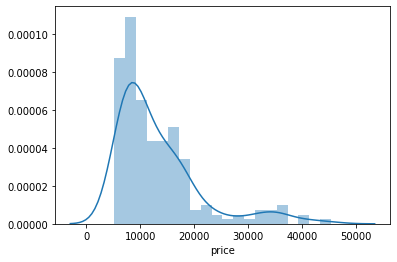

In [107]:
sns.distplot(imputed_cars.price, bins=20)

The distribution of the price is skewed toward the left with the majority of prices between 5000 and 20000, with prices not going bellow 5000 as per the data specifications.

**Q [1 Mark]:** Choose a suitable method and report the relationship (e.g., linear) between `price` and `horsepower`.

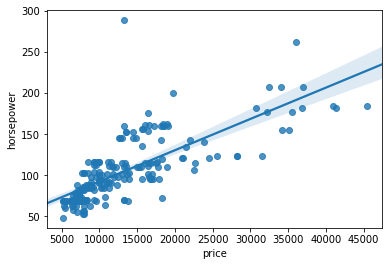

In [108]:
sns.regplot(imputed_cars.price,imputed_cars.horsepower)

The relationship between price and horsepower seems to be linear with a moderate positive correlation.

**Q [1 Mark]:** Choose a suitable method and report the relationship between `price` and `make`.

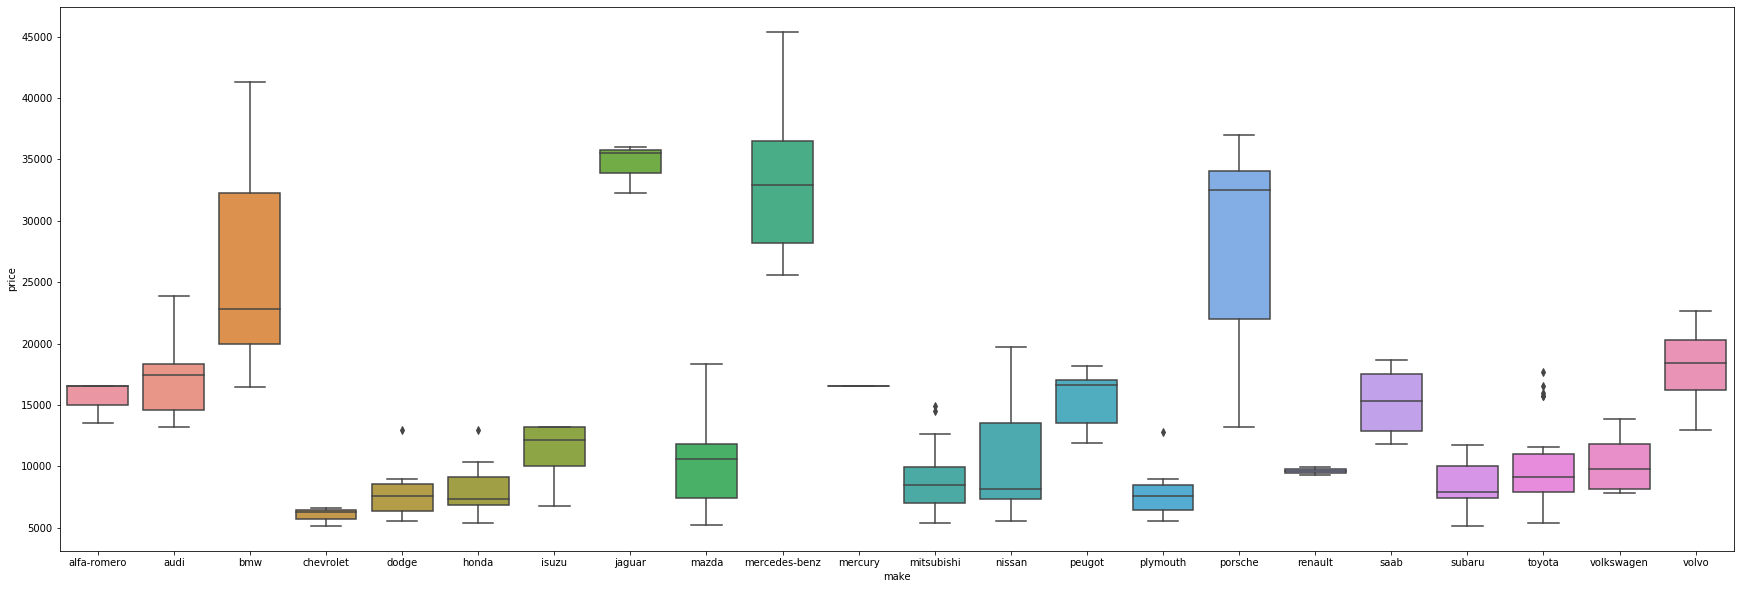

In [117]:
mp.pyplot.figure(figsize=(30,10))
sns.boxplot(x=imputed_cars.make,y=imputed_cars.price)

No two makers price distributions are exactly the same.  
The majority of makers sell mostly cars of price bellow 20 000.  
Only four makers first quartile is above 20 000: BMW, Jaguar, Mercedes-Benz and Porsche.

**Q [1 Mark]:** Choose a suitable method and report the relationship between `price` and `make`. Note: here suppose you are only interested in these makes `honda`, `audi`, `mazda`, `bmw`, `audi`, `toyota`, your X-axis thus only includes these makes.

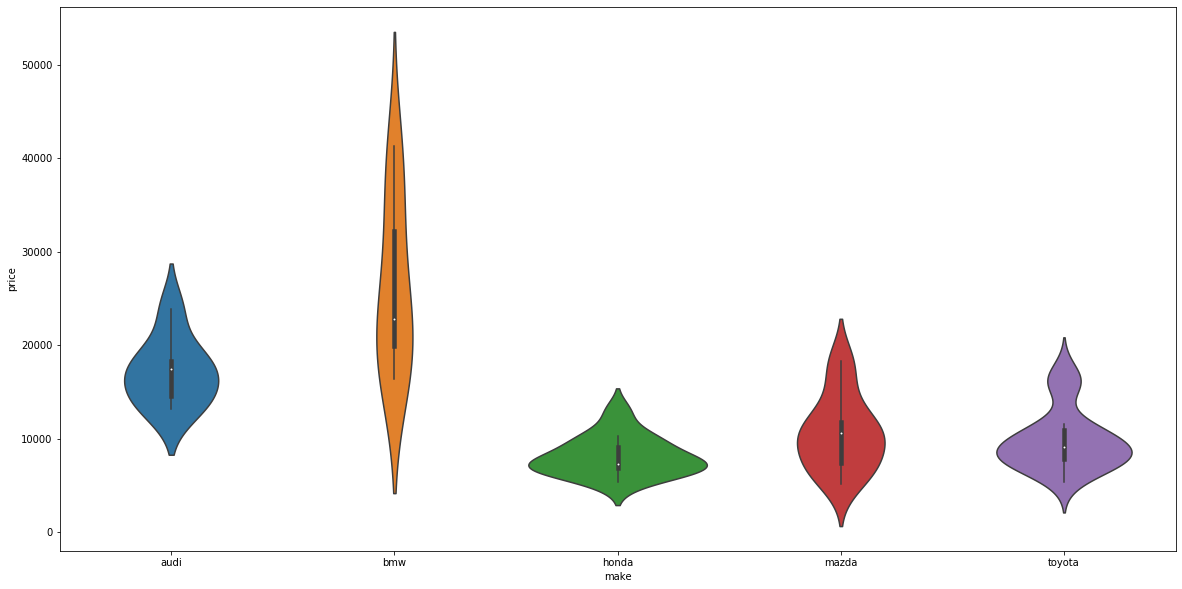

In [119]:
mp.pyplot.figure(figsize=(20,10))
sns.violinplot(x=imputed_cars[imputed_cars.make.isin(["honda","audi","mazda","bmw","audi","toyota"])].make,y=imputed_cars.price)

Examining less makers allows for a more readable violin plot which tells us that BMW cars' prices are relatively evenly spread along their price range but with more cars around the 20 000 price.  
On the contrary, the other makers seem to follow a smimilar pattern with most of their cars being at a lower price but with a good amount of cars at an higher price range than these makers' majority.

## Task 2 - KNN Modeling [10 Marks]

**Q [1 Mark]:** Based on the cleaned data, please only select columns with continuous values and import them into a new data frame named **numeric_cars**. Report the first five instances.

In [128]:
numeric_cars = imputed_cars_numeric
numeric_cars.head()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,normalized_losses,bore,stroke,horsepower,peak_rpm,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,21.0,27.0,122.0,3.47,2.68,111.0,5000.0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,9.0,21.0,27.0,122.0,3.47,2.68,111.0,5000.0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,9.0,19.0,26.0,122.0,2.68,3.47,154.0,5000.0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,10.0,24.0,30.0,164.0,3.19,3.40,102.0,5500.0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,8.0,18.0,22.0,164.0,3.19,3.40,115.0,5500.0,17450.0


**Q [1 Mark]:** The type of our target column `price` is numerical. Use [`Binarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html) to set feature values to 0 or 1 via a threshold (the mean value of that column). Report the first five instances.

In [ ]:
[code...]

**Q [2 Marks]:** Train the KNN model with classification.  
Note: 
1. 75% of the data is used as the training set and the rest 25% is as the test set. 
2. Report the AUC value. 
3. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [ ]:
[code...]

**Q [2 Marks]:** Train the KNN classfication model via different k values.   
Note:  
1. 75% of the data is used as the training set and the rest 25% is as the test set. 
2. Draw a figure with the x-axis representing the different k values `range(1,30)` in KNN and y-axis representing AUC value. Report the AUC performance on the training and test data respectively. 
3. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [ ]:
[code...]

**Q [2 Marks]:** Optimise the parameter k via cross-validated grid-search over a parameter grid.   
Note: 
1. Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to choose the best k value on the training set. The parameter grid is set to `np.arange(1, 30)`.
2. The model evaluation criteria is AUC performance.
3. Report the best k value and the corresponding AUC performance.
4. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [ ]:
[code...]

**Q [2 Marks]:** Train the KNN classification model via 5-fold CV.   
Note:  
1. Train a 5-fold CV KNN on the whole data. 
2. The model evaluation criteria is AUC performance.
3. Draw a figure with the x-axis representing the different k values `range(1,30)` in KNN and y-axis representing cross-validated AUC value. 
4. Apart from the specified parameters and `random_state=1` for all cases, please use the default setting for other parameters.

In [ ]:
[code...]